In [1]:
import face_recognition
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import glob
import numpy as np

In [2]:
def face_location_to_coord(face_location):
    x = face_location[0]
    y = face_location[3]
    w = face_location[2] - face_location[0]
    h = face_location[1] - face_location[3]
    return x, y, w, h

def face_location_to_coord_expanded(face_location, ratio):
    w = face_location[2] - face_location[0]
    h = face_location[1] - face_location[3]
    
#     if(w == h):
#         print("Rectangle")
    
    w_expand = int(ratio * w)
    h_expand = int(ratio * h)
    
    x_expand = int((face_location[2] + face_location[0] - w_expand)/2)
    y_expand = int((face_location[1] + face_location[3] - h_expand)/2)
    
    return x_expand, y_expand, w_expand, h_expand

def face_locations_to_coords(face_locations):
    coords = list()
    for face_location in face_locations:
#         coords.append(face_location_to_coord(face_location))
        coords.append(face_location_to_coord_expanded(face_location, 1.4))
    return coords

def crop_square_from_image(image, b_box):
    
    x, y, w, h = b_box
    
    x_img, y_img, c_img = image.shape
    
    x2 = x + w
    y2 = y + h
    
    padded_img = np.ones([w, h, c_img], dtype=int) * 255
    
    x_origin = x
    y_origin = y
    
    x = max(0, x)
    y = max(0, y)
    x2 = min(x_img, x2)
    y2 = min(y_img, y2)
    
    cropped_img = image[x:x2, y:y2, :]
    
    (x_crop, y_crop, c_crop) = cropped_img.shape
    padded_img[x - x_origin:x2 - x_origin, y - y_origin:y2 - y_origin, :] = cropped_img
    
    return padded_img
    

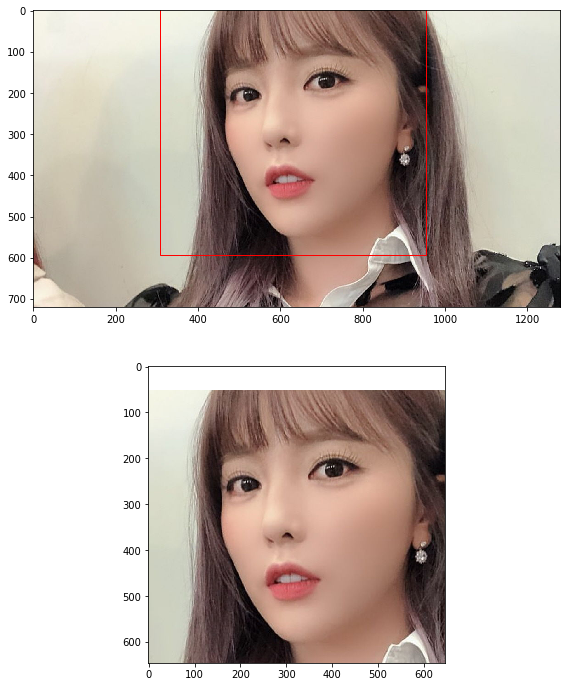

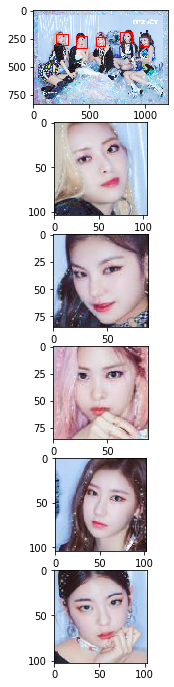

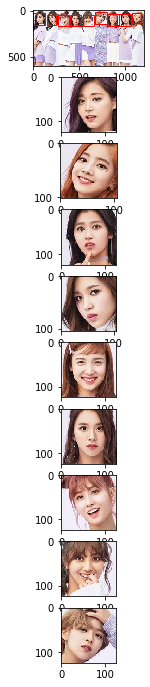

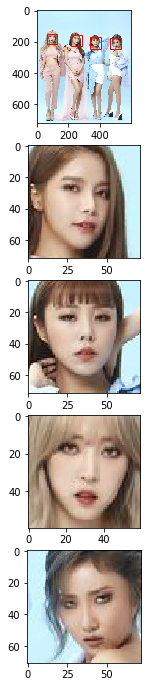

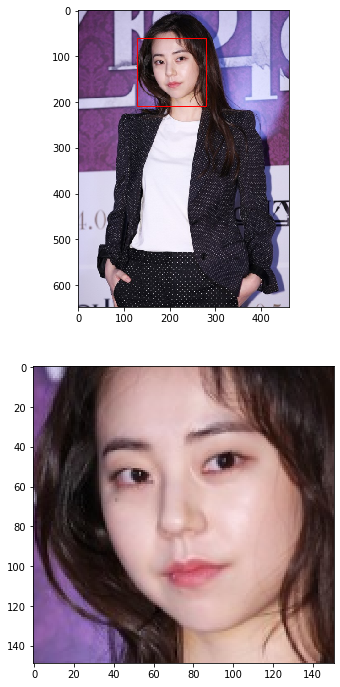

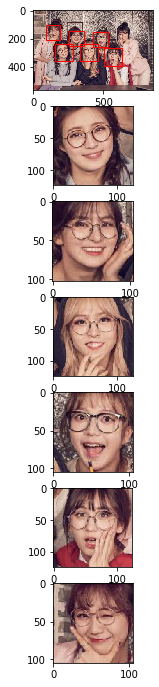

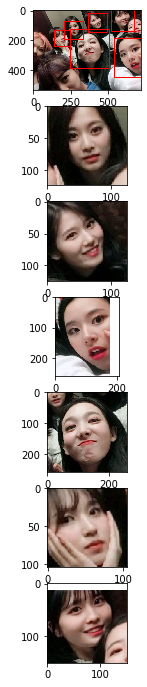

In [5]:
data_path = "../samples/*"

files = glob.glob(data_path)

files.sort()

for i, file in enumerate(files):
    image = face_recognition.load_image_file(file)
    face_locations = face_recognition.face_locations(image)

#     print(face_locations)

    coords = face_locations_to_coords(face_locations)
    
#     print(coords)
    
    if len(coords) != 0:

        fig, axes = plt.subplots(nrows=len(coords) + 1, ncols=1, figsize=(12, 12))
        axes[0].imshow(image)
        for j in range(len(coords)):
            x, y, w, h = coords[j]
            rect = patches.Rectangle((y, x), h, w, linewidth=1,edgecolor='r',facecolor='none')
            axes[0].add_patch(rect)
            cropped_image = crop_square_from_image(image, (x, y, w, h))
            axes[j+1].imshow(cropped_image)

        plt.show()
        
    else:
        fig, ax = plt.subplots(1)
        ax.imshow(image)
        plt.show()